# Logisitic Regression

---

- Classification algorithm (Binary)
- Supervised Learning Algorithm

#### EXAMPLES
- Predicting whether email is spam or not
- Predicting whether image is a cat or a dog
- Predicting  whether it is rainy or sunny

#### Basic feel
Find out the **best line** which separates the two classes of data
- theta0 + theta1 * x1 + theta2 * x2 = 0

#### Hypothesis
h_theta(x) = sigmoid(theta.T * x)

- For points lying on the positive side of the line and closer to it, value will be approximately 0.6
- For points lying on the negative side of the line and closer to it, value will be approximately 0.4
- Putting a point in h_theta(x), gives the confidence whether point belongs to class 1 or class 0
- (theta.T * x) gives a measure of the distance of the point from the line
- As we come closer, predictions become less confident
- If algorithm says, I am 55% **(h_theta(x) = 0.55)** confident that this point belongs to class 1 then classify it as belonging to class 1

#### Loss function
- Squared error loss function is non-convex function

#### Log Loss / Binary Cross Entropy

- This function actually minimizes the difference between two probability predictions
- eg: y =     1  0  1  1  0
  
  h_theta(x) = 0.9 0.1 0.99 0.82 0.1
    
    h_theta(x) = 0.5 0.5 0.6 0.4 0.3
- Here, the loss in Case I would be less than the loss in Case II. This loss function ensures this that the predicted confidence are as close to the actual truth values
- This is a **convex function**.
- Special case of categorical cross entropy
- J(theta)

#### Gradient Descent update rule
sigmoid(x) = 1 / (1 + exp(-x))

#### Derivative of sigmoid function
sigmoid'(x) = sigmoid(x) * (1 - sigmoid(x))

- Gradient descent update rule is same as in Linear Regression gradient descent update rule

---

## Steps
- Data Preparation
- Visualisation
- Create train and test set
- Create a Logistic Regression model
- Predictions
- Decision Boundary
- Using scikit-learn

## Data Preparation
There can be many ways to generate data
- Use some kind of normal distribution to generate your own toy dataset
- eg: Given a face check whether face is wearing mask or not

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1.0, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1.2, 0.1], [0.1, 1.3]])

dist_1 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_2 = np.random.multivariate_normal(mean_02, cov_02, 500)

In [5]:
print(dist_1.shape)
print(dist_2.shape)

(500, 2)
(500, 2)


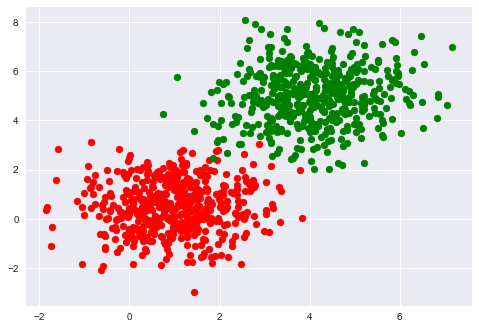

In [7]:
plt.style.use('seaborn')
plt.scatter(dist_1[:, 0], dist_1[:, 1], color='red')
plt.scatter(dist_2[:, 0], dist_2[:, 1], color='green')
plt.show()

### Experiment (for covariance)

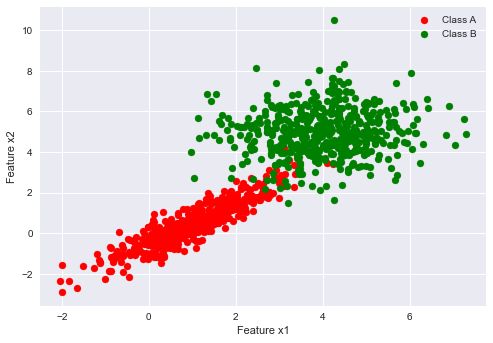

In [18]:
mean_03 = np.array([1, 0.5])
cov_03 = np.array([[1.0, 1], [1, 1.2]])                                   # positive covariance between x1 and x2

mean_04 = np.array([4, 5])
cov_04 = np.array([[1.2, 0.1], [0.1, 1.3]])

dist_3 = np.random.multivariate_normal(mean_03, cov_03, 500)
dist_4 = np.random.multivariate_normal(mean_04, cov_04, 500)

plt.style.use('seaborn')
plt.scatter(dist_3[:, 0], dist_3[:, 1], color='red', label='Class A')
plt.scatter(dist_4[:, 0], dist_4[:, 1], color='green', label='Class B')
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.show()

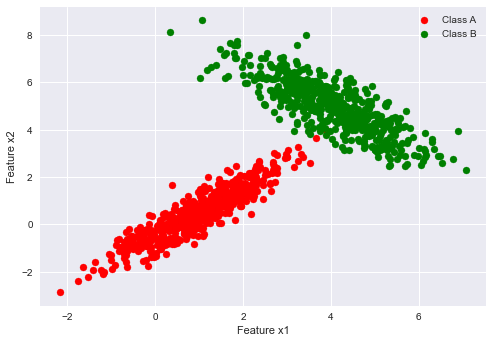

In [21]:
mean_03 = np.array([1, 0.5])
cov_03 = np.array([[1.0, 1], [1, 1.2]])                                     # positive covariance between x1 and x2

mean_04 = np.array([4, 5])
cov_04 = np.array([[1.2, -1], [-1, 1.3]])                                   # negative covariance between x1 and x2

dist_3 = np.random.multivariate_normal(mean_03, cov_03, 500)
dist_4 = np.random.multivariate_normal(mean_04, cov_04, 500)

plt.style.use('seaborn')
plt.scatter(dist_3[:, 0], dist_3[:, 1], color='red', label='Class A')
plt.scatter(dist_4[:, 0], dist_4[:, 1], color='green', label='Class B')
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.show()

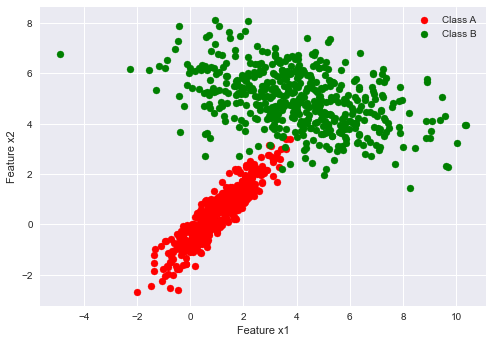

In [22]:
mean_03 = np.array([1, 0.5])
cov_03 = np.array([[1.0, 1], [1, 1.2]])                                     # positive covariance between x1 and x2

mean_04 = np.array([4, 5])
cov_04 = np.array([[5, -1], [-1, 1.3]])                                   # negative covariance between x1 and x2

dist_3 = np.random.multivariate_normal(mean_03, cov_03, 500)
dist_4 = np.random.multivariate_normal(mean_04, cov_04, 500)

plt.style.use('seaborn')
plt.scatter(dist_3[:, 0], dist_3[:, 1], color='red', label='Class A')
plt.scatter(dist_4[:, 0], dist_4[:, 1], color='green', label='Class B')
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.legend()
plt.show()

In [23]:
data = np.zeros((1000, 3))
print(data.shape)

(1000, 3)


In [24]:
tmp = data[:500, :-1]
print(tmp.shape)

(500, 2)


In [25]:
data[:500, :-1] = dist_1
data[500:, :-1] = dist_2
data[500:, -1] = 1

print(data.shape)

(1000, 3)


In [26]:
data[:5, :]

array([[ 1.54949124,  1.04829678,  0.        ],
       [-0.93768567,  1.60935726,  0.        ],
       [ 1.15276783, -0.78122264,  0.        ],
       [ 1.19199754,  0.56116625,  0.        ],
       [ 1.97072721,  0.02380065,  0.        ]])

In [27]:
data[497:505, :]

array([[1.32230761, 0.28299521, 0.        ],
       [0.86450624, 1.29590929, 0.        ],
       [1.20432433, 0.67041878, 0.        ],
       [5.13301107, 4.69339876, 1.        ],
       [4.70516594, 4.47516302, 1.        ],
       [2.8955167 , 6.50376443, 1.        ],
       [4.11975216, 5.98784003, 1.        ],
       [4.3666259 , 5.93155214, 1.        ]])

In [30]:
data[:, -1].shape

(1000,)

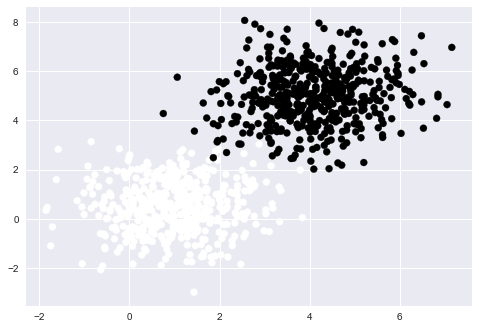

In [31]:
plt.scatter(data[:, 0], data[:, 1], c=data[:, -1])

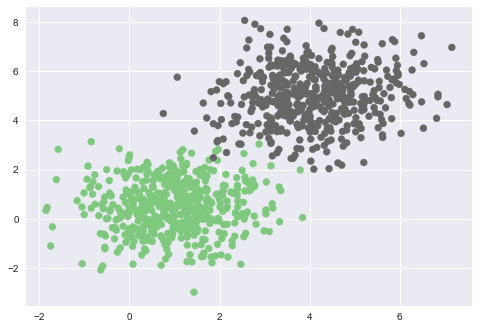

In [32]:
plt.scatter(data[:, 0], data[:, 1], c=data[:, -1], cmap=plt.cm.Accent)

In [38]:
# Shuffle the datapoints
np.random.shuffle(data)
print(data.shape)
print(data[:5])

(1000, 3)
[[-0.56334375 -0.62941456  0.        ]
 [ 3.99705144  4.42124805  1.        ]
 [ 5.56720382  4.79171502  1.        ]
 [ 4.91519115  5.02299418  1.        ]
 [ 2.02227805  0.65259708  0.        ]]


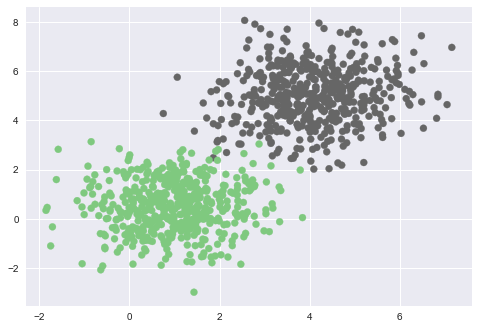

In [39]:
plt.scatter(data[:, 0], data[:, 1], c=data[:, -1], cmap=plt.cm.Accent)

In [41]:
print(data[:5])
print(data.shape)

[[-0.56334375 -0.62941456  0.        ]
 [ 3.99705144  4.42124805  1.        ]
 [ 5.56720382  4.79171502  1.        ]
 [ 4.91519115  5.02299418  1.        ]
 [ 2.02227805  0.65259708  0.        ]]
(1000, 3)


In [49]:
# Divide/Split data into train and test data
split = int(0.8 * data.shape[0])

X_train = data[:split, :-1]
Y_train = data[:split, -1]
X_test = data[split:, :-1]
Y_test = data[split:, -1]

In [50]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(800, 2)
(200, 2)
(800,)
(200,)


In [51]:
print(Y_test)

[0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 0.]


## Plot data and normalise it

In [52]:
Y_train.shape

(800,)

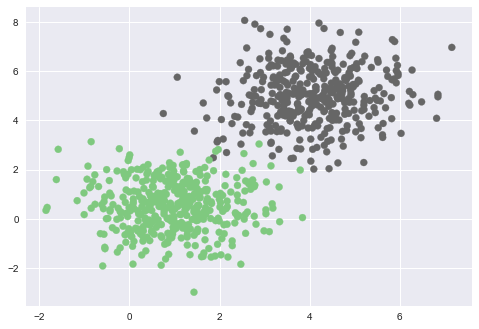

In [53]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.Accent)

In [55]:
X_train.mean(axis=0)

array([2.49912109, 2.73121351])

In [57]:
X_train.std(axis=0)

array([1.83756385, 2.49536159])

In [58]:
x_mean = X_train.mean(axis=0)
x_std = X_train.std(axis=0)
print(x_mean)
print(x_std)

[2.49912109 2.73121351]
[1.83756385 2.49536159]


In [59]:
X_train = (X_train - x_mean) / x_std

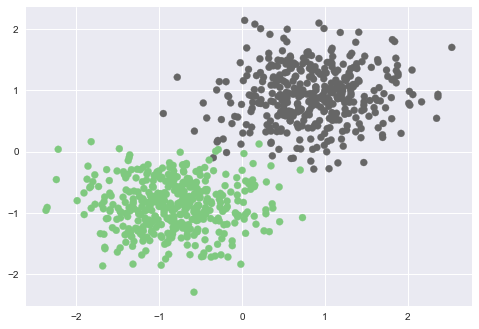

In [60]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.Accent)

### REMEMBER
Apply the same transformation to the test data (test data must be shifted by the same amount). So we need to apply the same transformation to the test data to retain the relative positioning of the data

In [61]:
X_test = (X_test - x_mean) / x_std

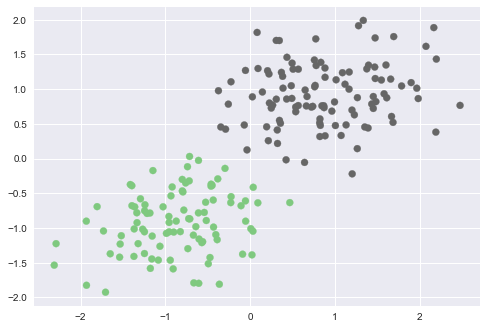

In [62]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.Accent)
plt.show()

In [63]:
X_train.mean(axis=0)

array([-6.14786000e-17, -1.23567823e-15])

In [64]:
X_train.std()

1.0000000000000002

## Logistic Regression implementation

In [65]:
def sigmoid(x):
    '''
    params - 
        x - array (m, 1)
    returns -
        scalar
    '''
    return 1.0 / (1.0 + np.exp(-x))

def hypothesis(X, theta):
    '''
    params -
        X - entire array (m, n + 1)
        theta (n + 1, 1)
    returns
        array (m, 1)
    '''
    return sigmoid(np.dot(X, theta))

In [66]:
sigmoid(100)         # Almost 1

1.0

In [67]:
sigmoid(-100)         # Almost 0

3.7200759760208356e-44

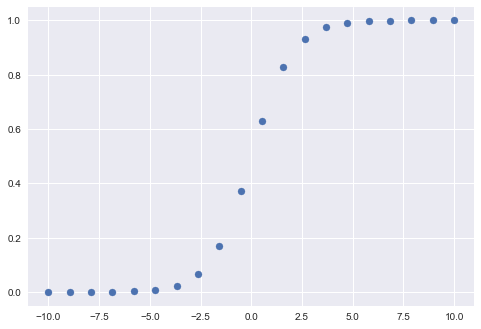

In [68]:
a = np.linspace(-10, 10, 20)  # 20 equally spaced values from -10 to 10
plt.scatter(a, sigmoid(a))

In [69]:
def error(X, y, theta):
    '''
    params -
        X - entire array (m, n + 1)
        y - (m, 1)
        theta - (n + 1, 1)
    returns -
        scalar value J(theta)
    '''
    y_ = hypothesis(X, theta)
    e = -1 * np.mean((y * np.log(y_)) + ((1 - y) * np.log(1 - y_)))
    return e

In [70]:
def gradient(X, y, theta):
    '''
    params -
        X - (m, n + 1)
        y - (m, 1)
        theta - (n + 1, 1)
    returns -
        gradient_vector - (n + 1, 1)
    '''
    hy = hypothesis(X, theta)
    grad = np.dot(X.T, (hy - y))
    m = X.shape[0]
    return grad / m

def gradient_descent(X, y, lr=0.1, max_itr=500):
    '''
    params - 
        X - (m, n + 1)
        y - (m, 1)
    returns -
        error_list, theta
    '''
    n = X.shape[1]
    error_list = []
    theta = np.zeros((n, 1))
    
    for i in range(max_itr):
        err = error(X, y, theta)
        error_list.append(err)
        
        # Compute gradient
        grad = gradient(X, y, theta)
        
        # Update theta
        theta = theta - lr * grad
    return error_list, theta

In [71]:
X_train.shape

(800, 2)

In [72]:
m = X_train.shape[0]
ones = np.ones((m, 1))
X_train_ = np.hstack((ones, X_train))

print(X_train_.shape)

(800, 3)


In [73]:
X_train_[:5]

array([[ 1.        , -1.66658961, -1.34674994],
       [ 1.        ,  0.81517187,  0.6772704 ],
       [ 1.        ,  1.66964687,  0.82573264],
       [ 1.        ,  1.31482237,  0.91841627],
       [ 1.        , -0.2594974 , -0.83299208]])

In [76]:
error_list, theta = gradient_descent(X_train_, Y_train.reshape((-1, 1)))

In [77]:
theta

array([[0.01531337],
       [2.17944916],
       [2.83855076]])

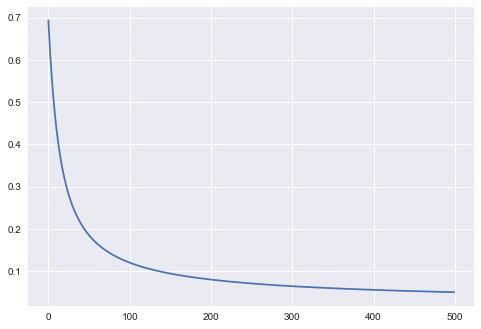

In [78]:
plt.plot(error_list)

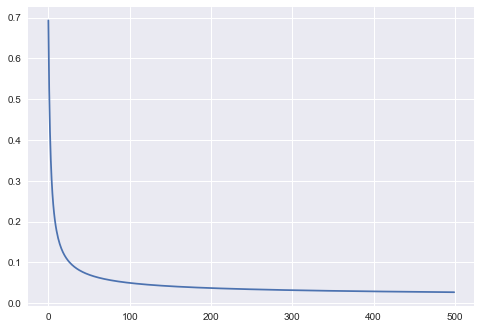

In [79]:
error_list, theta = gradient_descent(X_train_, Y_train.reshape((-1, 1)), 0.5)
plt.plot(error_list)

## Visualise decision surface

In [80]:
theta

array([[0.15730661],
       [2.89253326],
       [4.70214399]])

In [82]:
theta[0], theta[1], theta[2]

(array([0.15730661]), array([2.89253326]), array([4.70214399]))

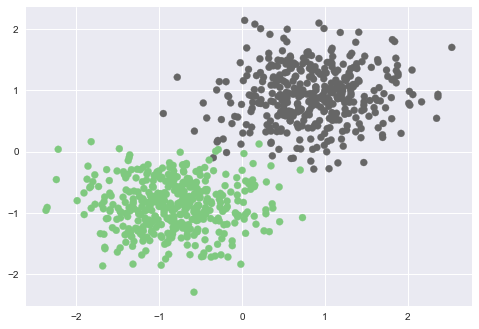

In [83]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.Accent)

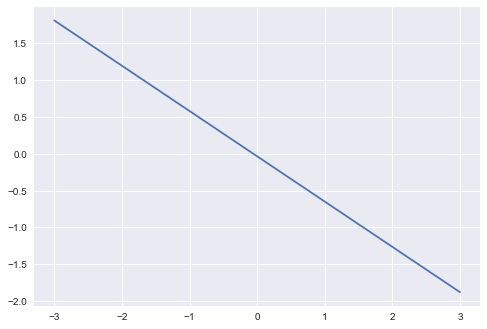

In [85]:
x1 = np.arange(-3, 4)
x2 = -1.0 * (theta[0] + theta[1] * x1) / theta[2]
plt.plot(x1, x2)

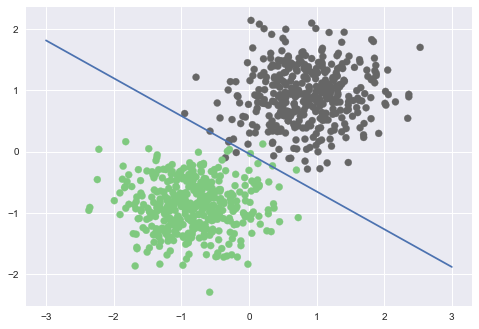

In [86]:
x1 = np.arange(-3, 4)
x2 = -1.0 * (theta[0] + theta[1] * x1) / theta[2]
plt.plot(x1, x2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.Accent)
plt.show()

## Predictions and accuracy

In [89]:
X_test_ = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
print(X_test_.shape)
print(X_test_[:3])

(200, 3)
[[ 1.         -1.64967526 -1.37212736]
 [ 1.          2.18924388  0.38132476]
 [ 1.          0.5679063   1.28803133]]


In [107]:
def predict(X, theta):
    hy = hypothesis(X, theta)
    n = hy.shape[0]
    
    outputs = np.zeros((n, 1))
    outputs[hy >= 0.5] = 1
    
    outputs = outputs.astype('int')
    return outputs

In [109]:
preds = predict(X_test_, theta)

In [110]:
preds.shape

(200, 1)

In [111]:
X_train_preds = predict(X_train_, theta)
X_test_preds = predict(X_test_, theta)

print(X_train_preds.shape)
print(X_test_preds.shape)

(800, 1)
(200, 1)


In [118]:
def accuracy(actual, preds):
    actual = actual.astype('int')
    acc = np.sum(actual == preds) / actual.shape[0]
    return acc

In [119]:
accuracy(Y_train.reshape((-1, 1)), X_train_preds) # Training accuracy is 99.25%

0.9925

In [120]:
accuracy(Y_test.reshape((-1, 1)), X_test_preds)   # Test accuracy is 100%

1.0

## Using Sk-learn for Logisitic Regression